In [74]:
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import math
import numpy as np
from keras.models import model_from_json

In [75]:
#load data

In [76]:
dataset = pd.read_csv("NVDA.csv", index_col='Date',parse_dates=['Date'])


In [77]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-20,187.500000,189.419998,184.210007,185.839996,185.379532,18123000
2017-09-21,181.639999,182.699997,177.610001,180.759995,180.312103,26890000
2017-09-22,180.300003,182.309998,178.600006,179.000000,178.556488,12280800
2017-09-25,177.750000,177.800003,170.160004,171.000000,170.576309,21864500
2017-09-26,176.449997,178.679993,170.350006,171.960007,171.533936,28140500


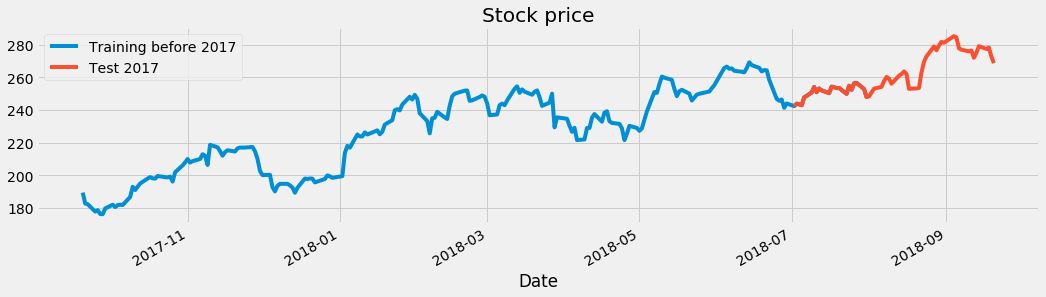

In [80]:

dataset[:'2018-07']['High'].plot(figsize=(16,4),legend=True, grid = True)
dataset['2018-07':]['High'].plot(figsize=(16,4),legend=True, grid = True)
plt.legend(["Training before 2017", 'Test 2017'])
plt.title("Stock price")
# plt.xlabel('Year', fontsize=20);
plt.show()

In [85]:
# Training & Testing Data
training_set = dataset[:'2018-07'].iloc[:,1:2].values
test_set = dataset['2018-07':].iloc[:,1:2].values
training_set.shape
type(training_set)

numpy.ndarray

In [82]:
# normalize data
scaler = MinMaxScaler()
print(scaler.fit(training_set))
train_scaled = scaler.transform(training_set)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [90]:
train_scaled.shape

(71, 1)

In [87]:
scaler.data_max_

array([218.669998])

In [91]:
# Using 60 days data to predict one day
X_train = []
Y_train = []
for i in range (10, train_scaled.shape[0]):
    X_train.append(train_scaled[i-10:i, 0])
    Y_train.append(train_scaled[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [92]:
X_train.shape

(61, 10)

In [93]:
Y_train.shape
# Y_train = np.reshape(Y_train, Y_train.shape[0], 1)
# Y_train = np.expand_dims(Y_train, -1)

(61,)

In [94]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_train.shape

(61, 10, 1)

In [95]:
# Y_train = np.expand_dims(Y_train, -1)
Y_train.shape

(61,)

In [96]:
X_train.shape

(61, 10, 1)

In [97]:
# LSTM
#input shape (samples, timesteps, dimension)
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(1))
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 50, batch_size = 32)

Epoch 1/50
61/61 [==============================] - 4s 64ms/step - loss: 0.3793
Epoch 2/50
61/61 [==============================] - 0s 1ms/step - loss: 0.1945
Epoch 3/50
61/61 [==============================] - 0s 1ms/step - loss: 0.0489
Epoch 4/50
61/61 [==============================] - 0s 1ms/step - loss: 0.0519
Epoch 5/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0511
Epoch 6/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0404
Epoch 7/50
61/61 [==============================] - 0s 1ms/step - loss: 0.0392
Epoch 8/50
61/61 [==============================] - 0s 1ms/step - loss: 0.0445
Epoch 9/50
61/61 [==============================] - 0s 1ms/step - loss: 0.0338
Epoch 10/50
61/61 [==============================] - 0s 1ms/step - loss: 0.0330
Epoch 11/50
61/61 [==============================] - 0s 1ms/step - loss: 0.0488
Epoch 12/50
61/61 [==============================] - 0s 1ms/step - loss: 0.0336
Epoch 13/50
61/61 [=============================

In [19]:
# # serialize model to JSON
# model_json = regressor.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# regressor.save_weights("model.h5")
# print("Saved model to disk")

Saved model to disk


In [22]:
# # load json and create model
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")

# # evaluate loaded model on test data
# loaded_model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
# # score = loaded_model.evaluate(X, Y, verbose=0)

Loaded model from disk


In [23]:
dataset.shape

(2188, 6)

In [98]:
#correct previous mistake
test_set = dataset['2017':].iloc[:,1:2].values

In [99]:
len(test_set)

253

In [100]:
# inputs = dataset[dataset.shape[0] - len(test_set) - 60:].values
dataset_total= pd.concat((dataset['High'][:'2018-07'], dataset['High']['2018-07':]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 10:].values

In [101]:
print (inputs.shape)
print (type(inputs))
inputs = inputs.reshape(-1, 1)

(263,)
<class 'numpy.ndarray'>


In [102]:
inputs = scaler.transform(inputs)
inputs.shape

(263, 1)

In [103]:
X_test = []
for i in range(10, inputs.shape[0]):
    X_test.append(inputs[i - 10:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predicted_price = regressor.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)


ValueError: x and y can be no greater than 2-D, but have shapes (61,) and (61, 10, 1)

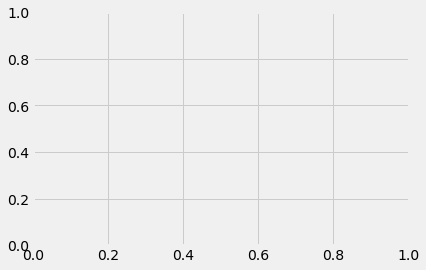

In [107]:
# visulize result
predicted_price = regressor.predict(X_train)
predicted_price = scaler.inverse_transform(predicted_price)
plt.plot(X_train, color= 'red', label = "Real Price")
plt.plot(predicted_price, color = 'blue', label = "Predict Price")
plt.title("LSTM")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [105]:
rmse = math.sqrt(mean_squared_error(test_set, predicted_price))
print ("rmse is {}".format(rmse))

rmse is 32.43673998361848
